'm importing necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point 

'm opening and reading my data file 

In [5]:
data = pd.read_csv('us_program_parameters.csv')

iewing the first 10 rows of the data

In [6]:
print(data.head(10))

                                             program program_rate state  \
0  Interruptible Power at Secondary Voltage (Alaska)         rate    AK   
1         Peak Solutions ProgramnDay Ahead (Arizona)      program    AZ   
2             Peak Solutions Program Day Of(Arizona)     program     AZ   
3            Interruptible Service Program (Arizona)         rate    AZ   
4            Smart Demand Response Program (Arizona)      program    AZ   
5       Base Interruptible Program (15) (California)      program    CA   
6       Base Interruptible Program (30) (California)      program    CA   
7  Emergency Load Reduction Program (day of) (Cal...      program    CA   
8  Emergency Load Reduction Program (day ahead) (...      program    CA   
9  Reliability Demand Response Resource Real Time...      program    CA   

                    comp  util load        trigger region      season   sm  \
0                Chugach  elec   any           NaN   west  year_round  1.0   
1                 

Printing the column names to check for discrepancies

In [7]:
print("Column names in the CSV file:")
print(data.columns)

Column names in the CSV file:
Index(['program', 'program_rate', 'state', 'comp', 'util', 'load ', 'trigger',
       'region', 'season', 'sm', 'em', 'dow', 'min_days', 'max_events',
       'max_days', 'min_dur', 'max_dur', 'start_time', 'end_time',
       'events_daily', 'max_consec', 'max_hours', 'notif_type', 'notif_time',
       'notif_delt', 'base_method', 'hist_pres', 'pay_function', 'elig'],
      dtype='object')


Printing the program, company, state, region, and season columns

In [8]:
columns_for_season_histogram = ['program', 'comp', 'state', 'region', 'season']
print(data[columns_for_season_histogram].head(10))

                                             program                   comp  \
0  Interruptible Power at Secondary Voltage (Alaska)                Chugach   
1         Peak Solutions ProgramnDay Ahead (Arizona)                    APS   
2             Peak Solutions Program Day Of(Arizona)                    APS   
3            Interruptible Service Program (Arizona)  Tuscon Electric Power   
4            Smart Demand Response Program (Arizona)  Tuscon Electric Power   
5       Base Interruptible Program (15) (California)                   PG&E   
6       Base Interruptible Program (30) (California)                   PG&E   
7  Emergency Load Reduction Program (day of) (Cal...                   PG&E   
8  Emergency Load Reduction Program (day ahead) (...                   PG&E   
9  Reliability Demand Response Resource Real Time...                  CAISO   

  state region      season  
0    AK   west  year_round  
1    AZ   west      summer  
2    AZ   west      summer  
3    AZ   west

ounting the number of programs for each region 

In [9]:
region_counts = data['region'].value_counts()
print("Number of programs for each region:")
print(region_counts)

Number of programs for each region:
region
west         74
southeast    32
northeast    18
midwest      17
Name: count, dtype: int64


Counting the number of programs for each season

In [10]:
season_counts = data['season'].value_counts()
print("Number of programs for each season:")
print(season_counts)

Number of programs for each season:
season
summer        65
year_round    48
winter        26
Name: count, dtype: int64


Counting the number of programs for each season in each region

In [11]:
region_season_counts = data.groupby(['region', 'season']).size().reset_index(name='counts')
print("Number of programs for each season in each region:")
print(region_season_counts)

Number of programs for each season in each region:
       region      season  counts
0     midwest      summer       4
1     midwest      winter       5
2     midwest  year_round       8
3   northeast      summer      12
4   northeast  year_round       6
5   southeast      summer      12
6   southeast      winter      12
7   southeast  year_round       8
8        west      summer      37
9        west      winter       9
10       west  year_round      26


et font default to arial

In [12]:
plt.rcParams['font.family'] = 'Arial'

Plotting the histogram of prgrams per season 

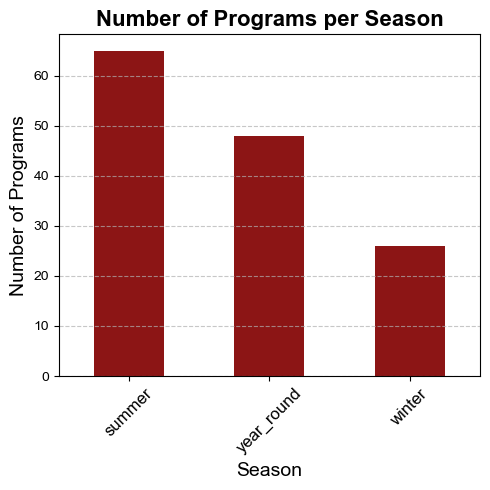

In [13]:
plt.figure(figsize=(5, 5))
season_counts.plot(kind='bar', color='#8c1515')
plt.title('Number of Programs per Season', fontweight='bold', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Number of Programs', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.show()

Calculating the total number of programs in each region

In [14]:
region_totals = region_season_counts.groupby('region')['counts'].sum().reset_index(name='total_counts')

Merging the total counts back to the region_season_counts

In [15]:
region_season_counts = region_season_counts.merge(region_totals, on='region')

Calculating the percentage of each season within each region

In [16]:
region_season_counts['percentage'] = (region_season_counts['counts'] / region_season_counts['total_counts']) * 100

Pivoting the data for plotting

In [17]:
pivot_data = region_season_counts.pivot(index='region', columns='season', values='percentage').fillna(0)

Plotting the stacked bar chart

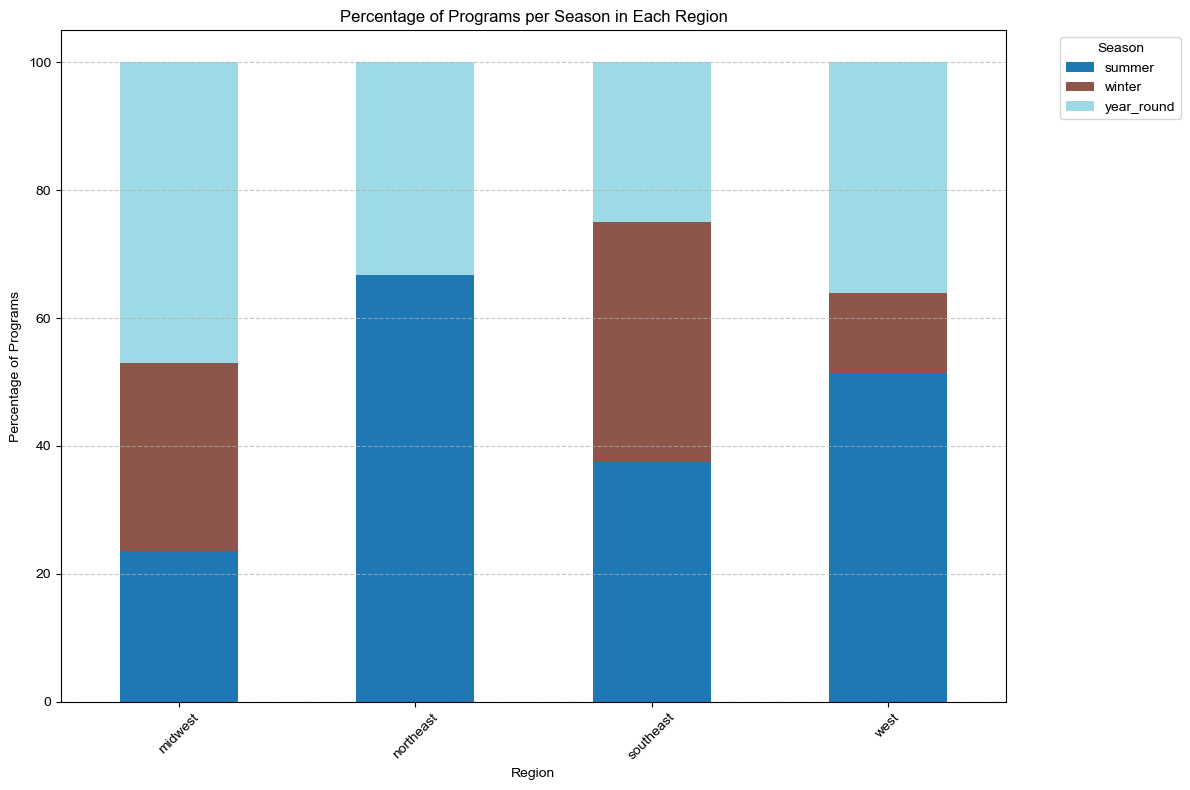

In [18]:
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Percentage of Programs per Season in Each Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Programs')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.show()

able for seasons per state <br>
Clean the data

In [19]:
data['season'] = data['season'].str.strip().str.lower().str.replace(r'\s+', ' ', regex=True)
data['state'] = data['state'].str.strip().str.upper()  # Ensure state abbreviations are uppercase

Filter the data for the seasons you are interested in, including 'year_round'

In [20]:
seasons_of_interest = ['summer', 'winter', 'spring', 'fall', 'year_round']
filtered_data = data[data['season'].isin(seasons_of_interest)]

Group and count the number of programs per state for each season

In [21]:
program_counts = filtered_data.groupby(['state', 'season']).size().reset_index(name='program_count')

Pivot the data to create a table format

In [22]:
pivot_table = program_counts.pivot(index='state', columns='season', values='program_count').fillna(0)

Display the table

In [23]:
print(pivot_table)

season  summer  winter  year_round
state                             
AK         0.0     0.0         1.0
AL         0.0     0.0         2.0
AR         2.0     2.0         0.0
AZ         3.0     0.0         0.0
CA        10.0     3.0         3.0
CO         7.0     6.0         1.0
CT         2.0     0.0         0.0
DC         0.0     0.0         1.0
DE         1.0     0.0         0.0
FL         2.0     2.0         0.0
GA         1.0     0.0         0.0
HI         0.0     0.0         2.0
IA         0.0     0.0         2.0
ID         1.0     0.0         0.0
IL         0.0     0.0         1.0
IN         2.0     4.0         3.0
KY         0.0     0.0         2.0
MA         2.0     0.0         0.0
MD         0.0     0.0         1.0
MI         0.0     0.0         1.0
MN         1.0     0.0         2.0
MO         1.0     0.0         0.0
MS         0.0     0.0         1.0
MT         0.0     0.0         2.0
NC         2.0     4.0         3.0
ND         0.0     0.0         4.0
NE         5.0     0

Count the number of states to ensure none are missing

In [24]:
unique_states = data['state'].nunique()
print(f"Total number of unique states: {unique_states}")

Total number of unique states: 46


Plot the data

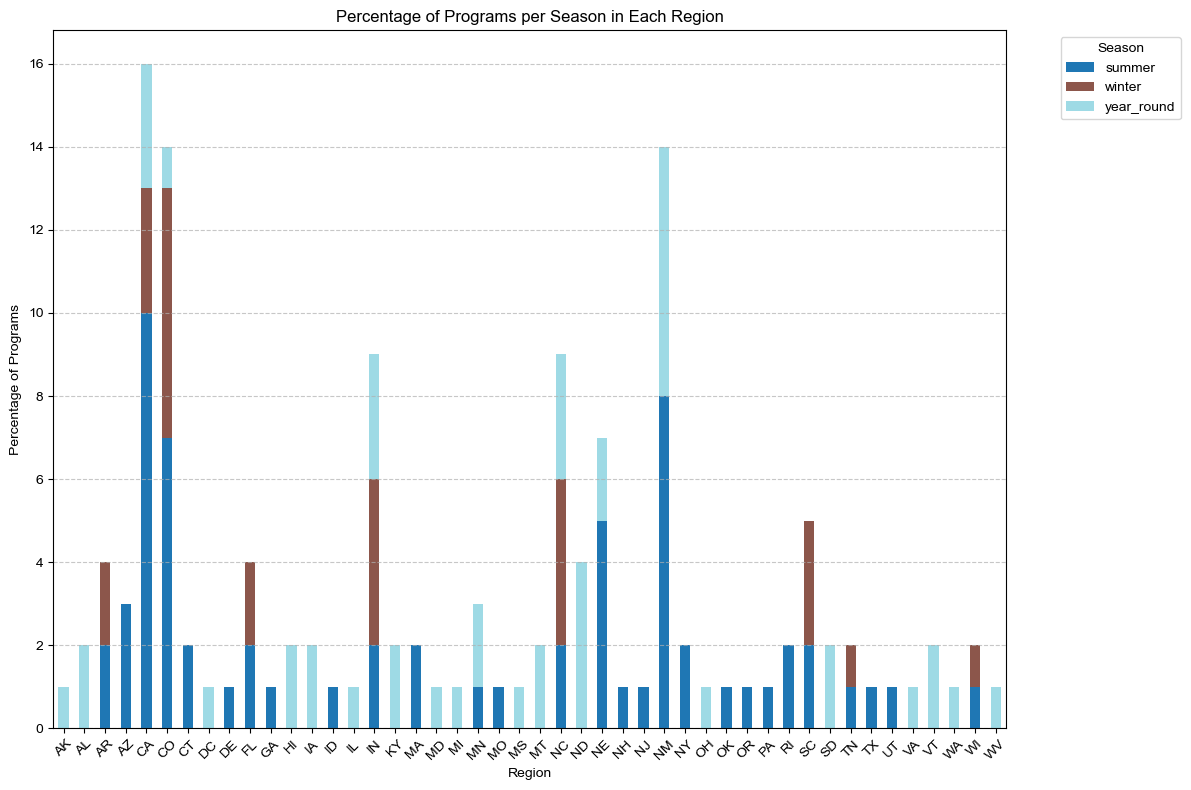

In [25]:
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Percentage of Programs per Season in Each Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Programs')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.show()

uration based on season<br>
Group by season and calculate the average minimum and maximum duration

In [26]:
avg_min_duration_by_season = filtered_data.groupby('season')['min_dur'].mean().reset_index()
avg_max_duration_by_season = filtered_data.groupby('season')['max_dur'].mean().reset_index()

Display the tables

In [27]:
print("Average Minimum Duration by Season:")
print(avg_min_duration_by_season)
print("\nAverage Maximum Duration by Season:")
print(avg_max_duration_by_season)

Average Minimum Duration by Season:
       season   min_dur
0      summer  2.531250
1      winter  3.400000
2  year_round  3.266667

Average Maximum Duration by Season:
       season   max_dur
0      summer  5.021739
1      winter  6.315789
2  year_round  6.000000


Plot the data for average minimum duration

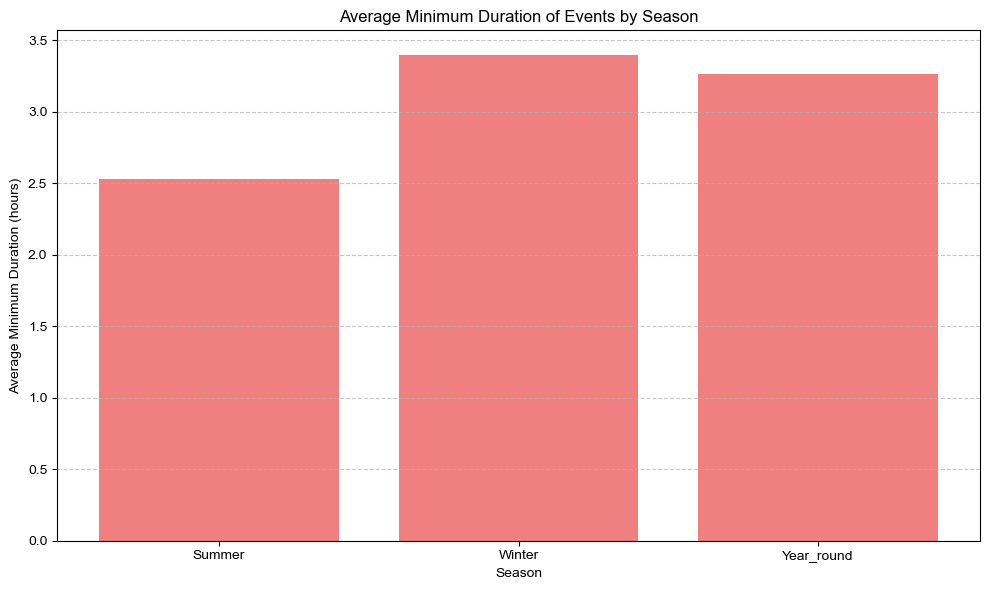

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(avg_min_duration_by_season['season'].str.capitalize(), avg_min_duration_by_season['min_dur'], color='lightcoral')
plt.title('Average Minimum Duration of Events by Season')
plt.xlabel('Season')
plt.ylabel('Average Minimum Duration (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Plot the data for average maximum duration

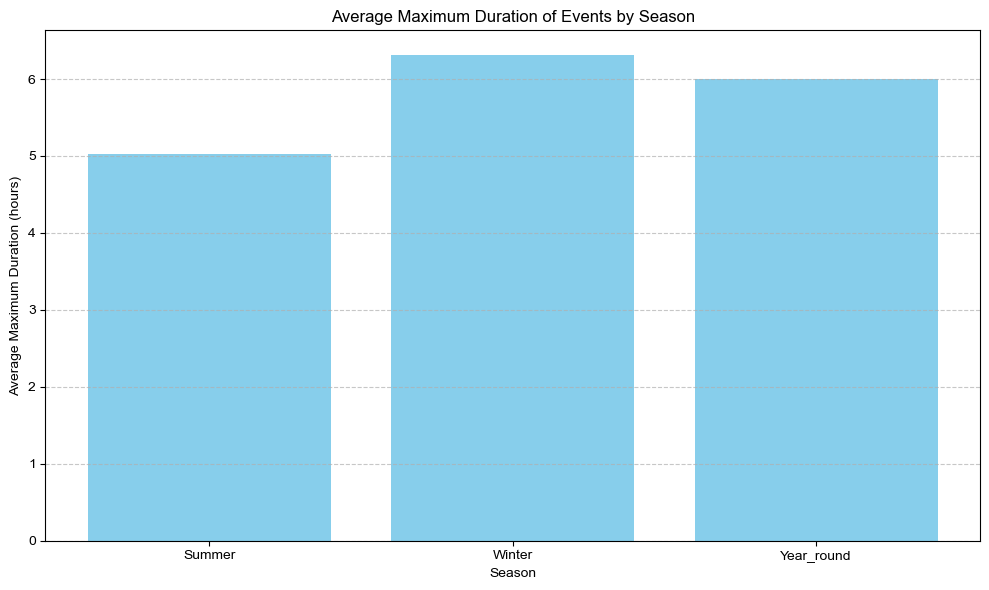

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(avg_max_duration_by_season['season'].str.capitalize(), avg_max_duration_by_season['max_dur'], color='skyblue')
plt.title('Average Maximum Duration of Events by Season')
plt.xlabel('Season')
plt.ylabel('Average Maximum Duration (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

uration based on region <br>
Group by region and calculate the average minimum and maximum duration

In [30]:
avg_min_duration_by_region = filtered_data.groupby('region')['min_dur'].mean().reset_index()
avg_max_duration_by_region = filtered_data.groupby('region')['max_dur'].mean().reset_index()

Display the tables

In [31]:
print("Average Minimum Duration by Region:")
print(avg_min_duration_by_region)
print("\nAverage Maximum Duration by Region:")
print(avg_max_duration_by_region)

Average Minimum Duration by Region:
      region   min_dur
0    midwest  3.666667
1  northeast  3.153846
2  southeast  3.666667
3       west  2.468750

Average Maximum Duration by Region:
      region   max_dur
0    midwest  6.909091
1  northeast  4.538462
2  southeast  6.250000
3       west  5.121951


Plot the data for average minimum duration

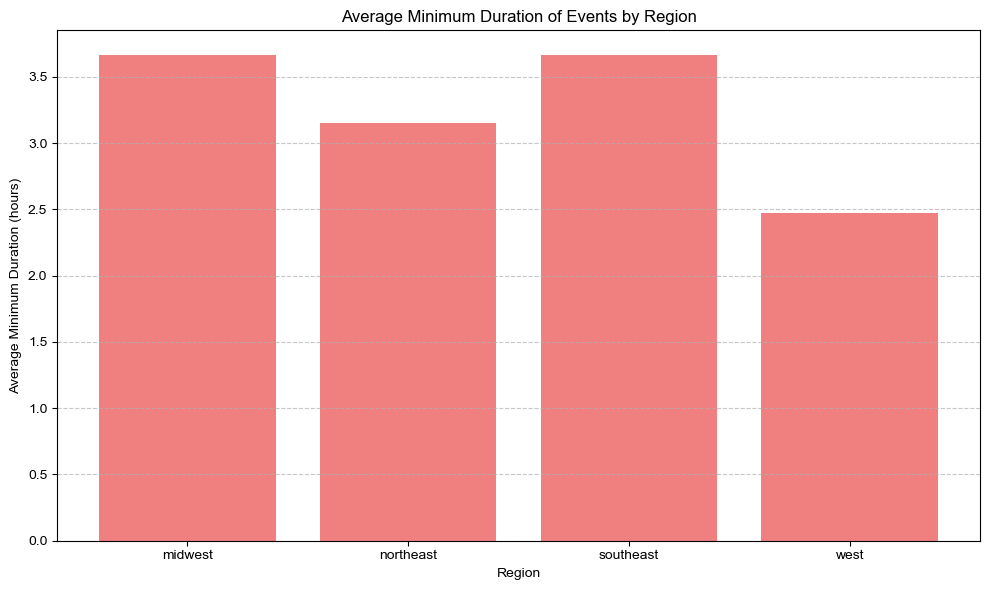

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(avg_min_duration_by_region['region'], avg_min_duration_by_region['min_dur'], color='lightcoral')
plt.title('Average Minimum Duration of Events by Region')
plt.xlabel('Region')
plt.ylabel('Average Minimum Duration (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Plot the data for average maximum duration

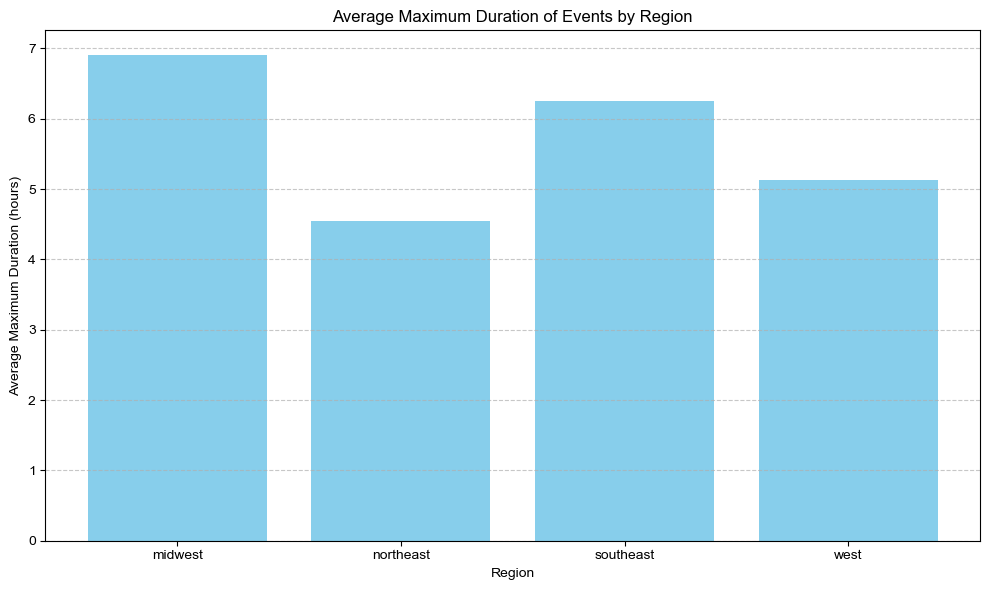

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(avg_max_duration_by_region['region'], avg_max_duration_by_region['max_dur'], color='skyblue')
plt.title('Average Maximum Duration of Events by Region')
plt.xlabel('Region')
plt.ylabel('Average Maximum Duration (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

ox and whisker plots for duration variables by region 

In [34]:
import seaborn as sns

Combine min_dur and max_dur into a single DataFrame

In [35]:
duration_data = filtered_data[['region', 'min_dur', 'max_dur']]

Melt the DataFrame to have a long format

In [36]:
melted_duration_data = duration_data.melt(id_vars=['region'], value_vars=['min_dur', 'max_dur'], 
                                          var_name='Duration Type', value_name='Duration')

Create the box and whisker plot

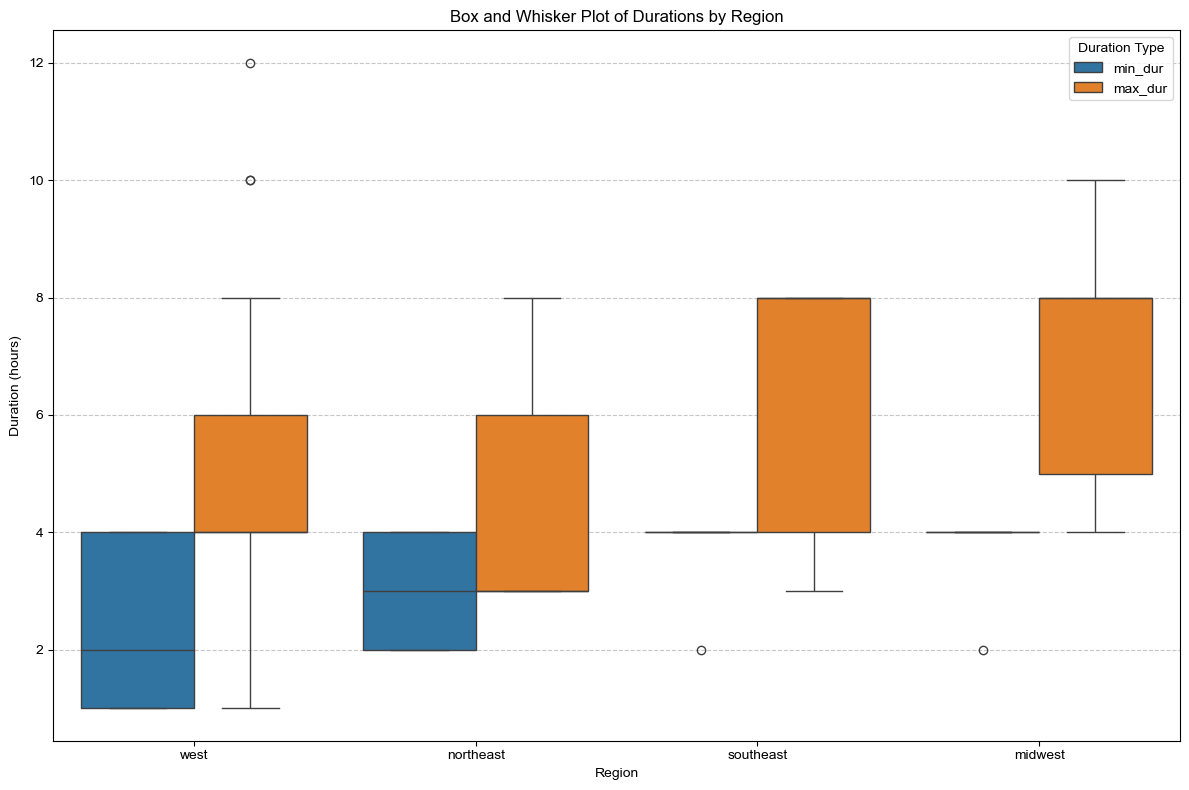

In [37]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='Duration', hue='Duration Type', data=melted_duration_data)
plt.title('Box and Whisker Plot of Durations by Region')
plt.xlabel('Region')
plt.ylabel('Duration (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

ox and whisker plots for duration variables by season<br>
Ensure 'season' column is in the filtered_data DataFrame<br>
filtered_data['season'] should already exist or be created based on your data

Combine min_dur and max_dur into a single DataFrame

In [38]:
duration_data = filtered_data[['season', 'min_dur', 'max_dur']]

Melt the DataFrame to have a long format

In [39]:
melted_duration_data = duration_data.melt(id_vars=['season'], value_vars=['min_dur', 'max_dur'], 
                                          var_name='Duration Type', value_name='Duration')

Create the box and whisker plot

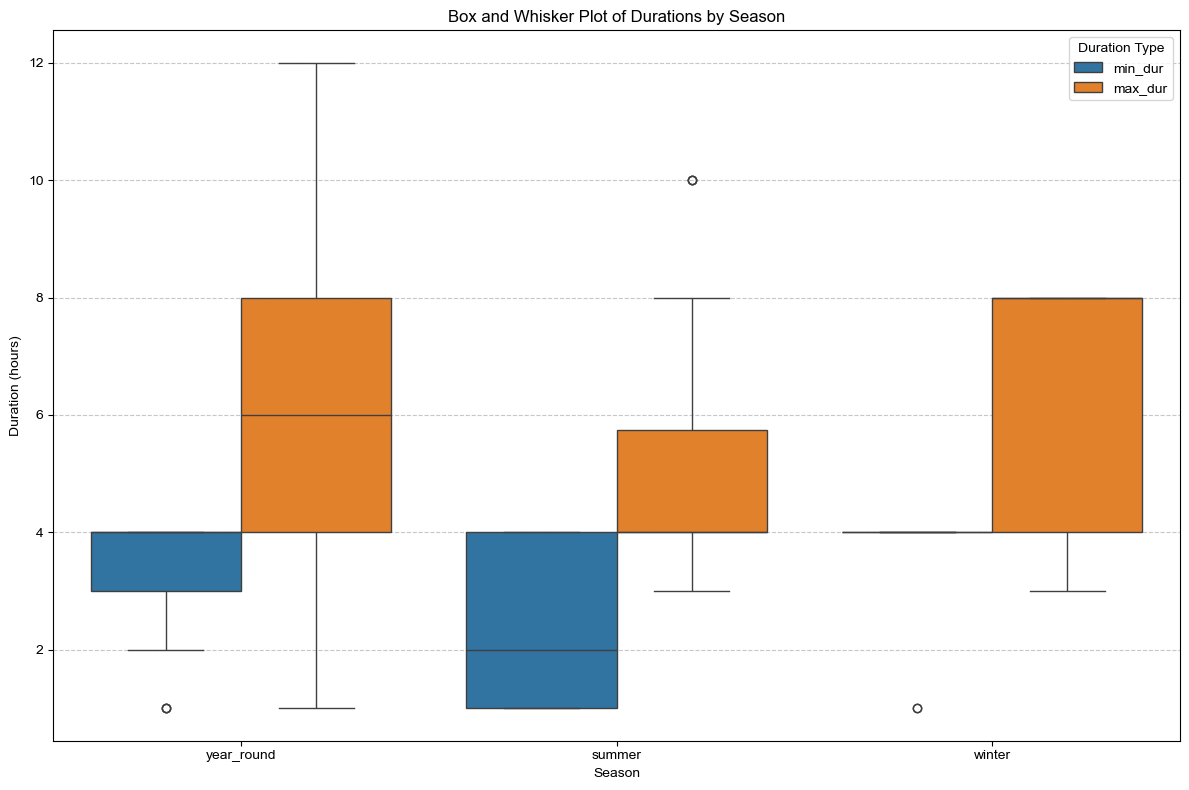

In [40]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='season', y='Duration', hue='Duration Type', data=melted_duration_data)
plt.title('Box and Whisker Plot of Durations by Season')
plt.xlabel('Season')
plt.ylabel('Duration (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Creating a box and whisker plot with region and season for max duration

      region      season duration_type  duration
0    midwest      summer           min       4.0
1    midwest      winter           min       8.0
2    midwest  year_round           min       4.0
3  northeast      summer           min       3.0
4  northeast  year_round           min       6.0


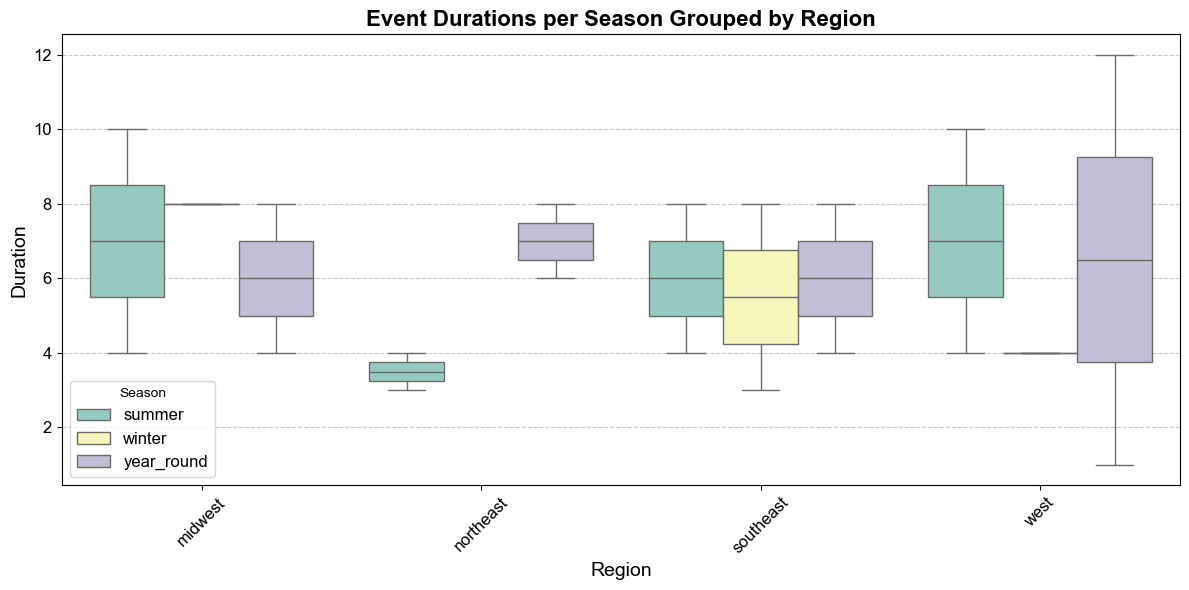

In [47]:
# Assuming your DataFrame is named 'data' and has columns 'region', 'season', and 'max_dur'

# Calculate the minimum and maximum durations per season for each region
durations = data.groupby(['region', 'season'])['max_dur'].agg(['min', 'max']).reset_index()

# Melt the DataFrame to long format for seaborn
durations_melted = durations.melt(id_vars=['region', 'season'], value_vars=['min', 'max'], var_name='duration_type', value_name='duration')

# Check the structure of the durations_melted DataFrame
print(durations_melted.head())

# Create the box and whisker plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='duration', hue='season', data=durations_melted, palette='Set3')
plt.title('Event Durations per Season Grouped by Region', fontweight='bold', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Duration', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Season', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

      region      season duration_type  duration
0    midwest      summer           min       4.0
1    midwest  year_round           min       4.0
2  northeast      summer           min       3.0
3  northeast  year_round           min       6.0
4  southeast      summer           min       4.0


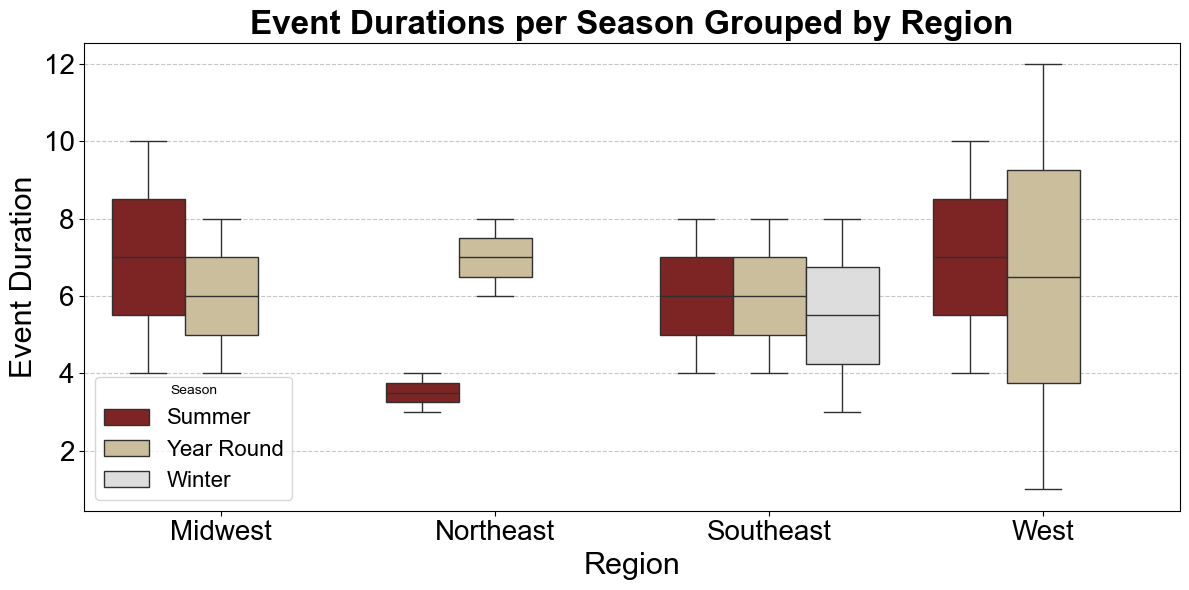

In [94]:
# Assuming your DataFrame is named 'data' and has columns 'region', 'season', and 'max_dur'

# Calculate the minimum and maximum durations per season for each region
durations = data.groupby(['region', 'season'])['max_dur'].agg(['min', 'max']).reset_index()

# Filter out specific combinations of season and region
excluded_combinations = [('winter', 'midwest'), ('winter', 'northeast'), ('winter', 'west')]
durations_filtered = durations[~durations[['season', 'region']].apply(tuple, axis=1).isin(excluded_combinations)]

# Melt the DataFrame to long format for seaborn
durations_melted = durations_filtered.melt(id_vars=['region', 'season'], value_vars=['min', 'max'], var_name='duration_type', value_name='duration')

# Check the structure of the durations_melted DataFrame
print(durations_melted.head())

# Define custom colors for each season
season_colors = {  
    'summer': '#8c1515ff',  
    'year_round': '#d2c295ff',    
    'winter': '#DDDDDD'   
}

# Create the box and whisker plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='duration', hue='season', data=durations_melted, palette=season_colors)
plt.title('Event Durations per Season Grouped by Region', fontweight='bold', fontsize=24)
plt.xlabel('Region', fontsize=22)
plt.ylabel('Event Duration', fontsize=22)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Season', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Capitalize the x-axis labels
current_labels = plt.gca().get_xticklabels()
new_labels = [label.get_text().title() for label in current_labels]
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=0, fontsize=20)

# Capitalize the legend labels and remove underscores
legend = plt.gca().get_legend()
for text in legend.get_texts():
    new_text = text.get_text().replace('_', ' ').title()
    text.set_text(new_text)
    
plt.show()





Notification Type Histogram 

C:\Users\juzzz\AppData\Local\Temp\ipykernel_13936\3160881155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['notif_type'] = data_cleaned['notif_type'].replace('day_of ', 'day_of')
C:\Users\juzzz\AppData\Local\Temp\ipykernel_13936\3160881155.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['notif_type'] = data_cleaned['notif_type'].str.replace('_', ' ').str.title()


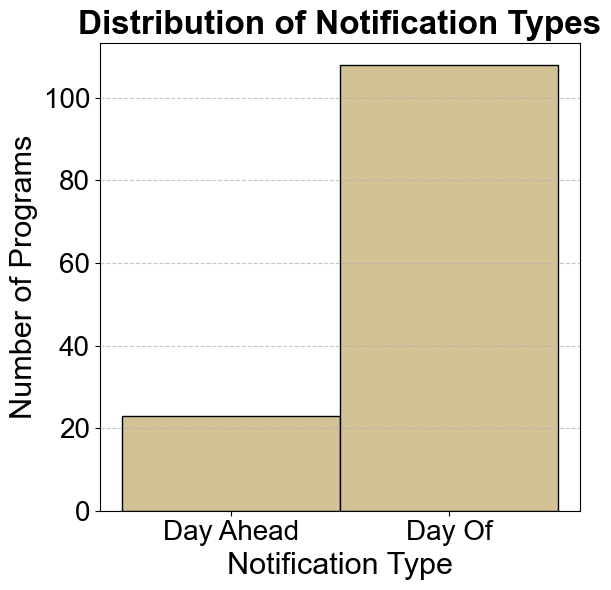

In [90]:
# Assuming your DataFrame is named 'data' and has a column 'notif_type'

# Filter out "prescheduled" and merge "day_of " into "day_of"
data_cleaned = data[data['notif_type'] != 'prescheduled']
data_cleaned['notif_type'] = data_cleaned['notif_type'].replace('day_of ', 'day_of')

# Replace underscores with spaces and capitalize the labels
data_cleaned['notif_type'] = data_cleaned['notif_type'].str.replace('_', ' ').str.title()

# Plot the histogram with combined "day_of" bars
plt.figure(figsize=(6, 6))
sns.histplot(data=data_cleaned, x='notif_type', discrete=True, kde=False, color='#d2c295', alpha=1.0)

# Customize the plot
plt.title('Distribution of Notification Types', fontweight='bold', fontsize=24)
plt.xlabel('Notification Type', fontsize=22)
plt.ylabel('Number of Programs', fontsize=22)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

Box and whisker plot of notifcation time delta

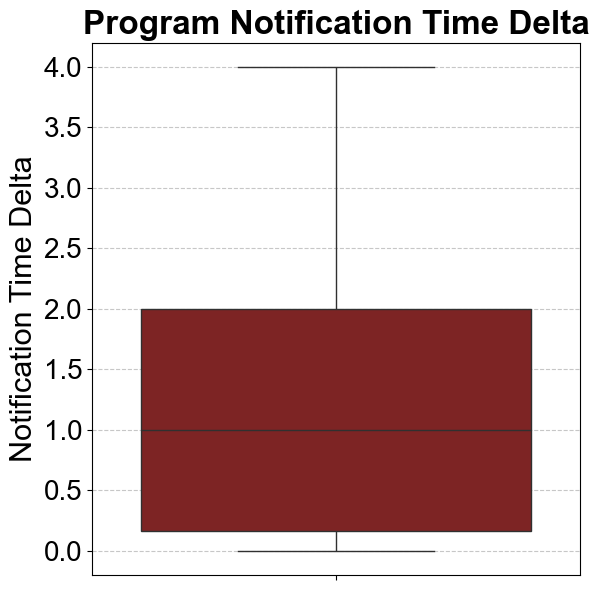

In [86]:
# Assuming your DataFrame is named 'data' and has columns 'notif_delt' and 'notif_type'

# Filter out rows where 'notif_type' is 'day_ahead'
filtered_data = data[data['notif_type'] != 'day_ahead']

# Create the box and whisker plot
plt.figure(figsize=(6, 6))  # Set the figure size
sns.boxplot(data=filtered_data, y='notif_delt', color='#8c1515ff')  # Use the same color code if needed

# Customize the plot
plt.title('Program Notification Time Delta', fontweight='bold', fontsize=24)
plt.ylabel('Notification Time Delta', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()